In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl

from func2graph import models, data, tools

In [4]:
plt.rcParams.update({
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'font.size': 10
})

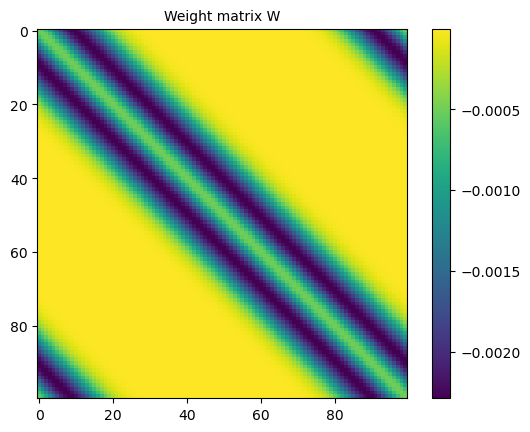

range of W: -0.002289390821430426 -1.1396944061378814e-12


In [5]:
# set random seed
np.random.seed(42)

# PARAMETERS
dt = 0.0001         # time-step in seconds
N = 100             # number of neurons
tau = 0.01          # synaptic time-constant in seconds

# Weight parameters
sig_1 = 6.98
sig_2 = 7
a1 = 1
a2 = 1.0005

# Create weight matrix W
indices = np.arange(N)
i_indices = indices.reshape(N, 1)
j_indices = indices.reshape(1, N)
x = np.minimum(np.abs(i_indices - j_indices), N - np.abs(i_indices - j_indices))
W = a1 * (np.exp(-x**2 / (2 * sig_1**2)) - a2 * np.exp(-x**2 / (2 * sig_2**2)))

# Other parameters
b = 0.001           # uniform feedforward input
noise_sd = 0.3      # amplitude of noise
noise_sparsity = 1.5  # noise is injected with the probability that a standard normal exceeds this
r = 0.025           # recurrence strength                                ############################## 0.025
threshold = 7.35e-4 # spiking threshold

plt.imshow(W)
plt.colorbar()
plt.title('Weight matrix W')
plt.show()

print('range of W:', W.min(), W.max())

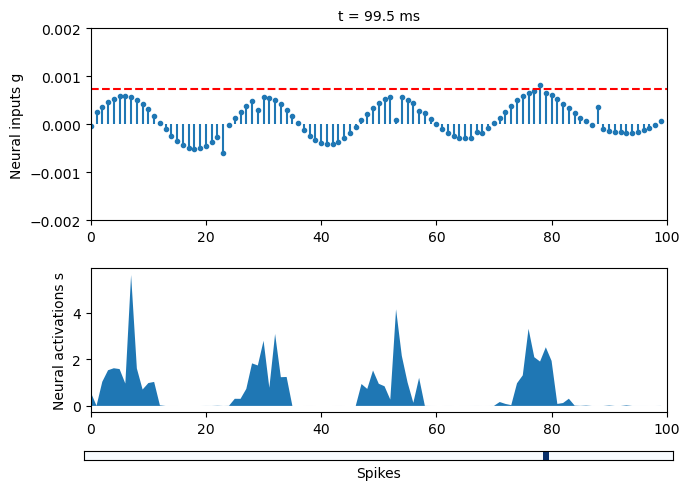

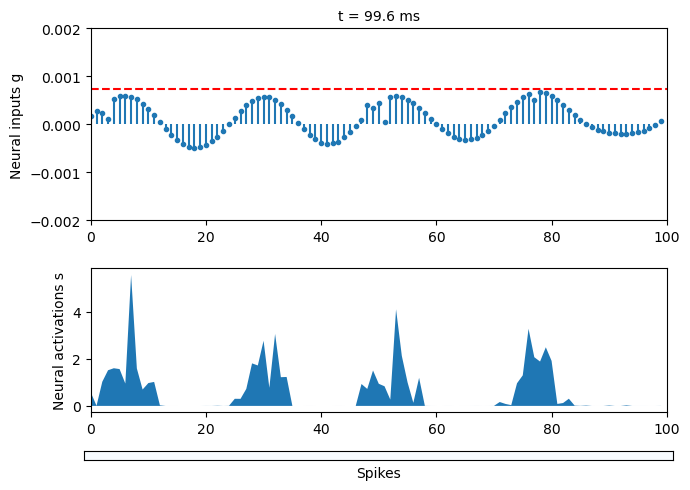

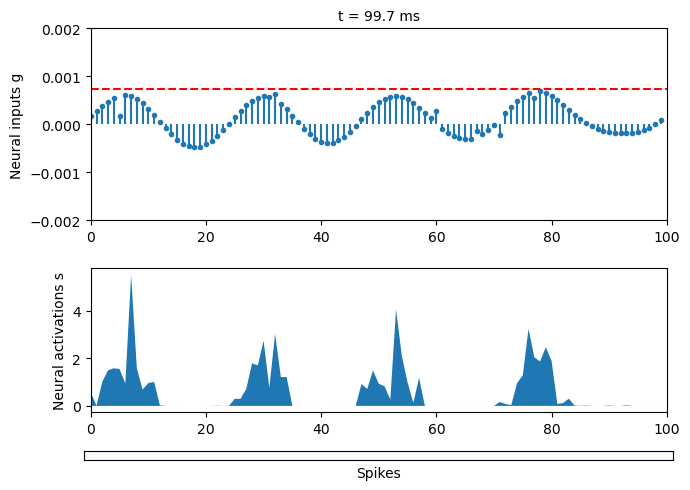

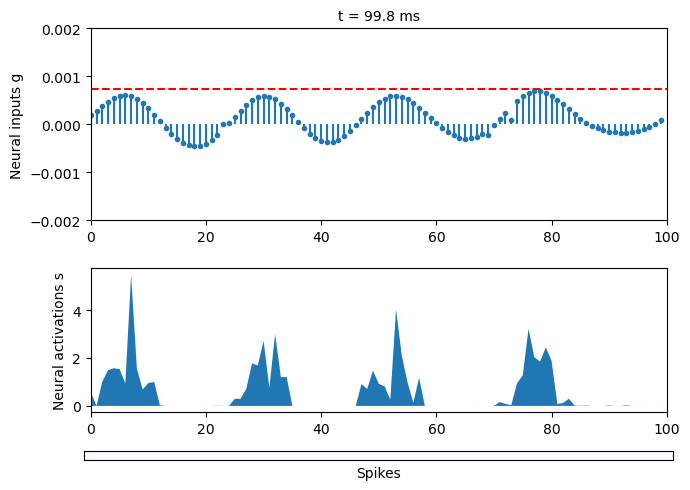

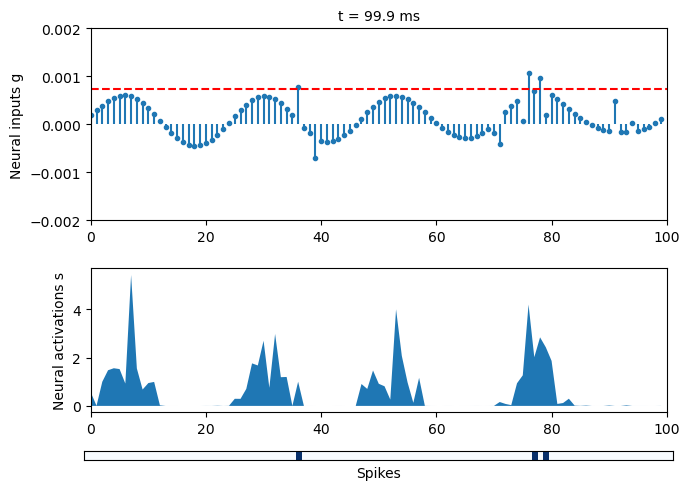

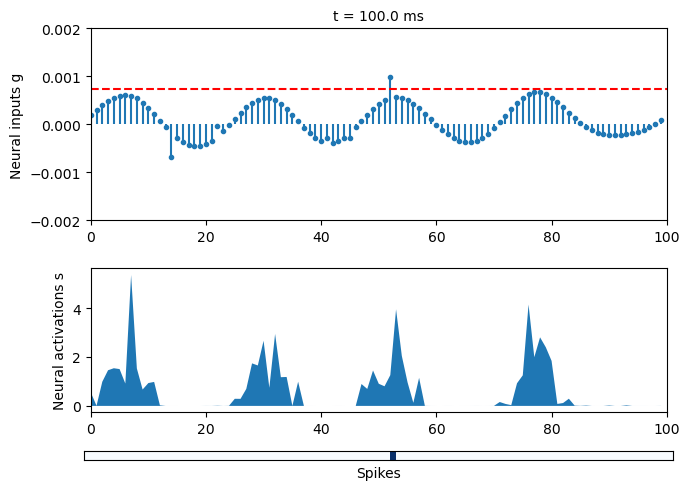

(100, 30000)


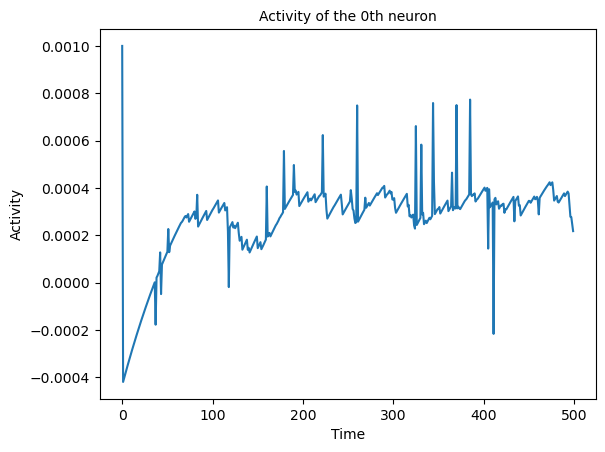

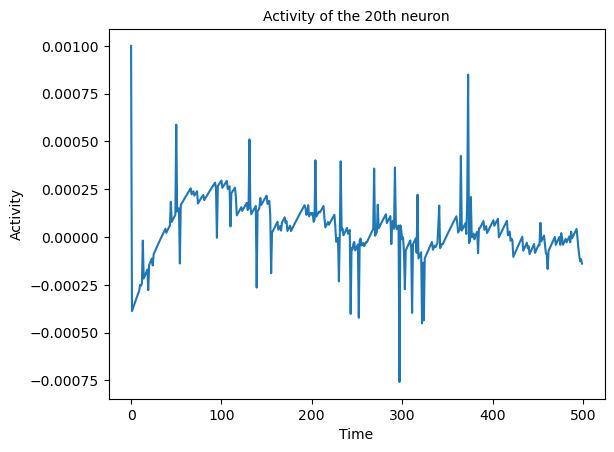

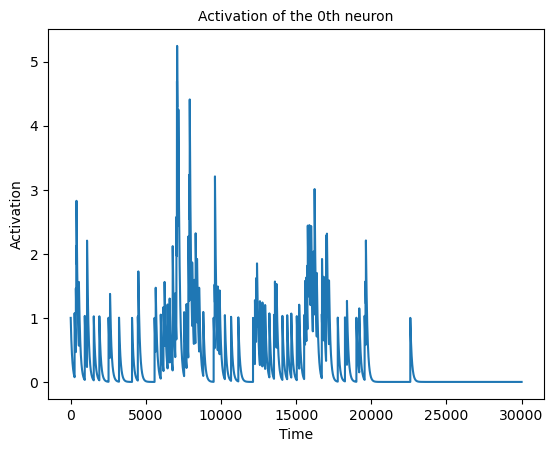

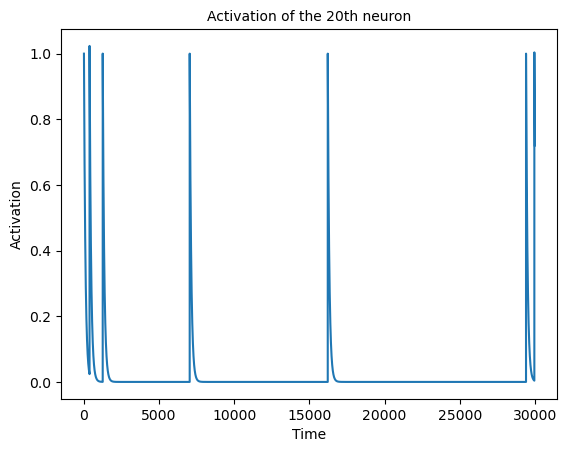

In [6]:
s = np.zeros(N)     # starting activations
t = 0

# Set up the plotting environment
plt.ion()  # Turn on interactive mode
# fig = plt.figure(figsize=(10, 8))

total_time = 30000

activity = []
activation = []
all_spike = []

for i in range(total_time):
    # Dynamics
    noise = noise_sd * np.random.randn(N) * (np.random.randn(N) > noise_sparsity)
    I = r * np.dot(s, W) + b * (1 + noise)  # neuron inputs
    spike = I > threshold                    # binary neural spikes
    s = s + spike.astype(float) - s / tau * dt  # update activations

    # Store the activity
    activity.append(I.copy().reshape(N, 1))
    activation.append(s.copy().reshape(N, 1))
    all_spike.append(spike.copy().reshape(N, 1))

    t += 1

    if 995 <= t <= 1000:

        # Clear the figure for the next frame
        plt.clf()

        # Plot neural inputs g
        ax1 = plt.axes([0.05, 0.55, 0.9, 0.4])
        ax1.stem(range(N), I, markerfmt='.', linefmt='-', basefmt=' ')
        ax1.set_xlim(0, N)
        ax1.set_ylim(-0.002, 0.002)
        ax1.axhline(y=threshold, color='red', linestyle='--')
        ax1.set_ylabel('Neural inputs g')
        ax1.set_title(f't = {t * 0.1:.1f} ms')

        # Plot neural activations s
        ax2 = plt.axes([0.05, 0.15, 0.9, 0.3])
        ax2.fill_between(range(N), s)
        ax2.set_xlim(0, N)
        ax2.set_ylabel('Neural activations s')

        # Plot spikes
        ax3 = plt.axes([0.04, 0.05, 0.92, 0.02])
        ax3.imshow([spike], aspect='auto', cmap='Blues')
        ax3.set_xlabel('Spikes')
        ax3.set_xticks([])
        ax3.set_yticks([])

        # Update the plot
        plt.pause(0.01)

activity = np.concatenate(activity, axis=1)
activation = np.concatenate(activation, axis=1)
all_spike = np.concatenate(all_spike, axis=1)

print(activity.shape)

# Plot the first neurons' activity
plt.plot(activity[0, :500])
plt.xlabel('Time')
plt.ylabel('Activity')
plt.title('Activity of the 0th neuron')
plt.show()

plt.plot(activity[20, :500])
plt.xlabel('Time')
plt.ylabel('Activity')
plt.title('Activity of the 20th neuron')
plt.show()

plt.plot(activation[0, :])
plt.xlabel('Time')
plt.ylabel('Activation')
plt.title('Activation of the 0th neuron')
plt.show()

plt.plot(activation[20, :])
plt.xlabel('Time')
plt.ylabel('Activation')
plt.title('Activation of the 20th neuron')
plt.show()

(100, 30000)


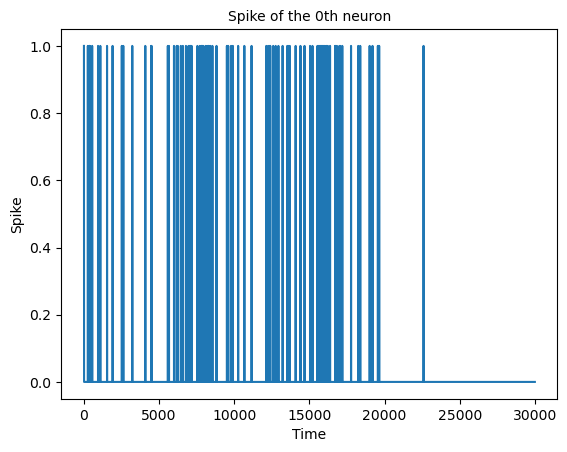

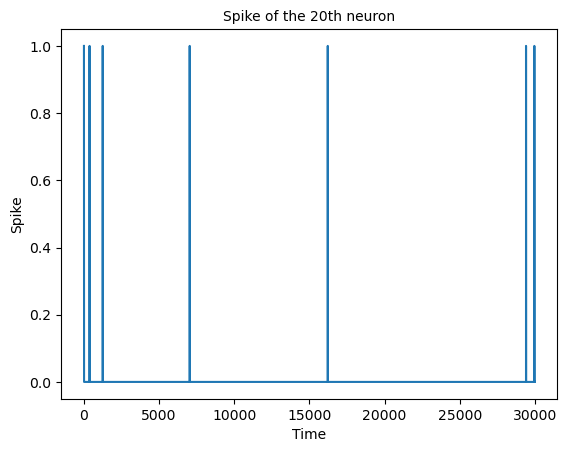

In [7]:
print(all_spike.shape)

plt.plot(all_spike[0, :])
plt.xlabel('Time')
plt.ylabel('Spike')
plt.title('Spike of the 0th neuron')
plt.show()

plt.plot(all_spike[20, :])
plt.xlabel('Time')
plt.ylabel('Spike')
plt.title('Spike of the 20th neuron')
plt.show()

In [9]:
np.save('../../data/Fiete/activity.npy', activity)
np.save('../../data/Fiete/activation.npy', activation)
np.save('../../data/Fiete/all_spike.npy', all_spike)
np.save('../../data/Fiete/connectivity.npy', W)